In [12]:
import cv2
import numpy as np
import math as mt
import matplotlib.pyplot as plt


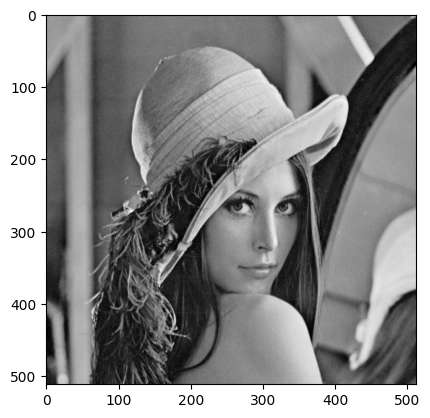

In [13]:
img=cv2.imread("CoverImages/lena.tiff",0)
plt.imshow(img,cmap='gray')
plt.show()

In [14]:
def gaussian_function(sigma,u,v):
    l = mt.pow(2.71, (-(v**2 + u**2)/(2*sigma*sigma))) /(2*mt.pi*sigma*sigma)
    return l

In [15]:
def gaussion_filter(sigma):
    z = int(np.ceil(3*sigma))
    row = col = 2*z+1
    kernel = np.zeros((row,col))
    set = [x for x in range(-z,z+1)]
    for i in range(len(set)):
        for j in range(len(set)):
            kernel[i][j] = gaussian_function(sigma,set[i],set[j])
    return (kernel / np.sum(kernel))

In [16]:
sigma = 0.5
gaussion_filter(sigma)

array([[7.29162520e-08, 2.88828525e-05, 2.12118557e-04, 2.88828525e-05,
        7.29162520e-08],
       [2.88828525e-05, 1.14407851e-02, 8.40222698e-02, 1.14407851e-02,
        2.88828525e-05],
       [2.12118557e-04, 8.40222698e-02, 6.17067952e-01, 8.40222698e-02,
        2.12118557e-04],
       [2.88828525e-05, 1.14407851e-02, 8.40222698e-02, 1.14407851e-02,
        2.88828525e-05],
       [7.29162520e-08, 2.88828525e-05, 2.12118557e-04, 2.88828525e-05,
        7.29162520e-08]])

In [17]:
np.sum(gaussion_filter(sigma))

1.0

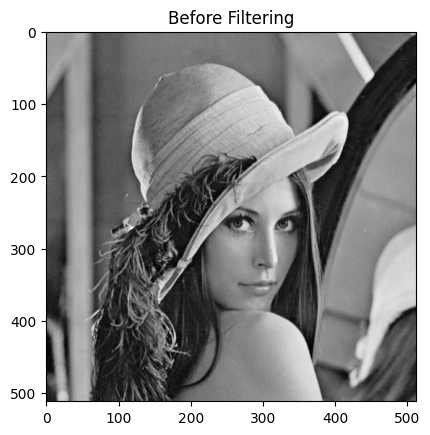

In [18]:
im = cv2.imread('CoverImages/lena.tiff',0)
plt.imshow(im, cmap='gray')
plt.title("Before Filtering")
plt.show()

In [19]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

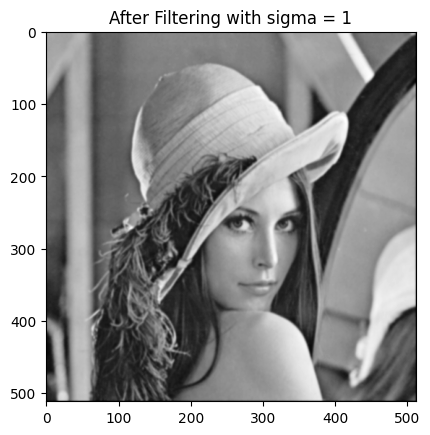

In [20]:
sigma = 1
img1 = convolution(im,gaussion_filter(sigma))
plt.imshow(img1, cmap='gray')
plt.title("After Filtering with sigma = 1")
plt.show()

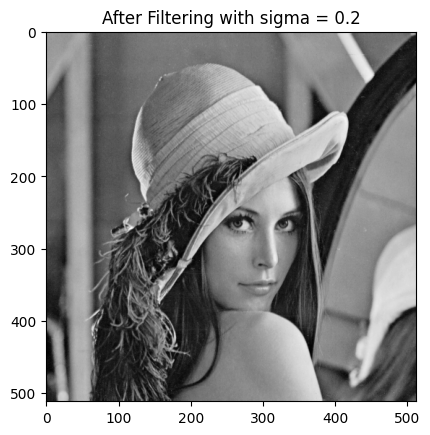

In [21]:
sigma = 0.2
img1 = convolution(im,gaussion_filter(sigma))
plt.imshow(img1, cmap='gray')
plt.title("After Filtering with sigma = 0.2")
plt.show()

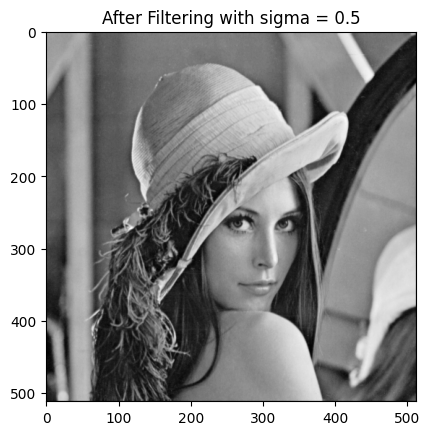

In [22]:
sigma = 0.5
img1 = convolution(im,gaussion_filter(sigma))
plt.imshow(img1, cmap='gray')
plt.title("After Filtering with sigma = 0.5")
plt.show()

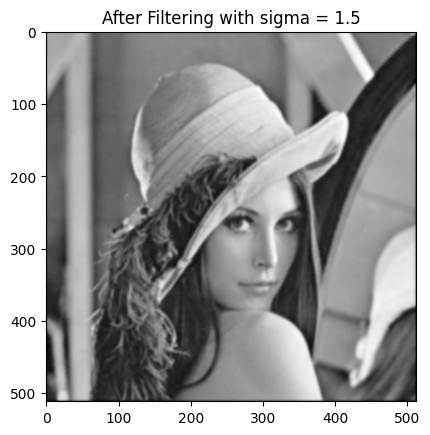

In [23]:
sigma = 1.5
img1 = convolution(im,gaussion_filter(sigma))
plt.imshow(img1, cmap='gray')
plt.title("After Filtering with sigma = 1.5")
plt.show()